In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pickle
import joblib


In [2]:
path = f"D:/A/miniproject3/datasets/final_dataset.csv"
if os.path.exists(path):
    final_df = pd.read_csv(path)
    print("Dataset Loaded Successfully")
    if 'price' not in final_df.columns:
        print("Error: 'Price' column not found in the dataset!")
        exit()
else:
    print("Error: File not found!")


Dataset Loaded Successfully


In [3]:

train_size = int(len(final_df) * 0.8)
train, test = final_df[:train_size], final_df[train_size:]


In [4]:
def adf_test(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] < 0.05:
        print("Data is stationary")
    else:
        print("Data is not stationary")


In [5]:
print(final_df.columns)


Index(['Date', 'centre_name', 'commodity_name', 'price'], dtype='object')


In [7]:

adf_test(final_df["price"]) 
final_df["Price_Diff"] = final_df["price"].diff().dropna()
adf_test(final_df["Price_Diff"].dropna())


ADF Statistic: -39.728863113513206
p-value: 0.0
Data is stationary
ADF Statistic: -103.57614923764
p-value: 0.0
Data is stationary


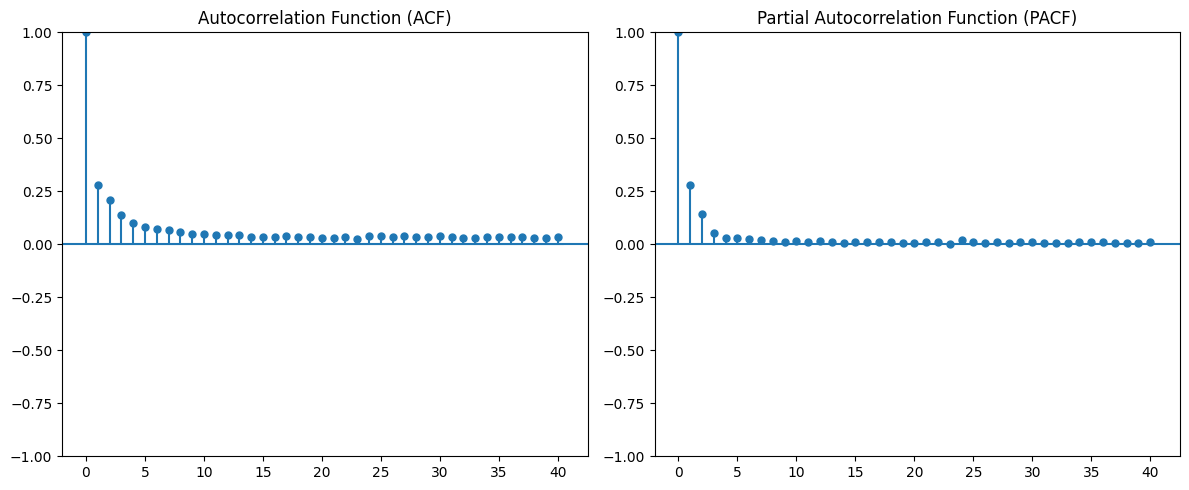

In [10]:

### Step 5: ACF & PACF Plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot ACF on the first subplot (axes[0])
plot_acf(final_df["price"].dropna(), lags=40, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF)')

# Plot PACF on the second subplot (axes[1])
plot_pacf(final_df["price"].dropna(), lags=40, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()



In [11]:
auto_model = auto_arima(final_df["price"], seasonal=False, trace=True)
print(auto_model.summary())


d:\A\miniproject3\projectenv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\A\miniproject3\projectenv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\A\miniproject3\projectenv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\A\miniproject3\projectenv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\A\miniproject3\projectenv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warni

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=113.97 sec


d:\A\miniproject3\projectenv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3915894.227, Time=2.83 sec


d:\A\miniproject3\projectenv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3836476.800, Time=3.55 sec


d:\A\miniproject3\projectenv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3770205.000, Time=19.42 sec


d:\A\miniproject3\projectenv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3915892.227, Time=1.36 sec


d:\A\miniproject3\projectenv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=58.70 sec


d:\A\miniproject3\projectenv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=66.30 sec


d:\A\miniproject3\projectenv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=127.68 sec


d:\A\miniproject3\projectenv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3770203.000, Time=8.13 sec


d:\A\miniproject3\projectenv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=21.32 sec


d:\A\miniproject3\projectenv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0]             : AIC=inf, Time=22.18 sec


d:\A\miniproject3\projectenv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0]             : AIC=3836474.800, Time=1.86 sec


d:\A\miniproject3\projectenv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=54.78 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 502.271 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:               349397
Model:               SARIMAX(0, 1, 1)   Log Likelihood            -1885099.500
Date:                Mon, 14 Apr 2025   AIC                        3770203.000
Time:                        23:54:08   BIC                        3770224.528
Sample:                             0   HQIC                       3770209.187
                             - 349397                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8745      0.001  -1727.549      0.000      -0.876   

In [12]:
p, d, q = auto_model.order  


In [14]:
model = ARIMA(final_df["price"], order=(p, d, q))
model_fit = model.fit()
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:               349397
Model:                 ARIMA(0, 1, 1)   Log Likelihood            -1885099.500
Date:                Tue, 15 Apr 2025   AIC                        3770203.000
Time:                        00:04:33   BIC                        3770224.528
Sample:                             0   HQIC                       3770209.187
                             - 349397                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8745      0.001  -1727.549      0.000      -0.876      -0.874
sigma2      2843.1866      1.047   2715.963      0.000    2841.135    2845.238
Ljung-Box (L1) (Q):                6989.18   Jarque-

In [16]:
model = ARIMA(train["price"], order=(p,d,q)) 
model_fit = model.fit()
  

In [18]:
forecast = model_fit.forecast(steps=len(test))
mae = mean_absolute_error(test["price"], forecast)
mse = mean_squared_error(test["price"], forecast)
print(f"MAE: {mae}, MSE: {mse}")  


MAE: 35.20519923709712, MSE: 2383.7517439318835


In [19]:
with open("arima_model.pkl", "wb") as model_file:
    pickle.dump(model_fit, model_file)
with open("arima_model.pkl", "rb") as model_file:
    loaded_model = pickle.load(model_file)
forecast = loaded_model.forecast(steps=30)    


<Figure size 1500x600 with 0 Axes>

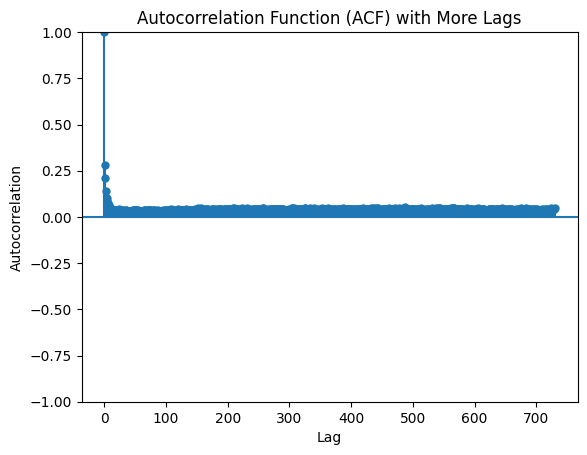

In [ ]:
plt.figure(figsize=(15, 6))
plot_acf(final_df['price'].dropna(), lags=730)  # Adjust lags as needed
plt.title('Autocorrelation Function (ACF) with More Lags')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()
